# Исследование успешности игр

## 1. Получение данных

Импорт библиотек.

In [1]:
import pandas as pd
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Откроем файл games.csv, сохраним его в переменной `df` и посмотрим первые 5 строк таблицы.

In [2]:
df = pd.read_csv('games.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим общую информацию о данных таблицы `df`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего в таблице 11 столбцов.

Разберём, какие в `df` столбцы и какую информацию они содержат:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Посмотрим общую информацию о датафрейме.

In [4]:
df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


Построим общую гистограмму для всех числовых столбцов таблицы.

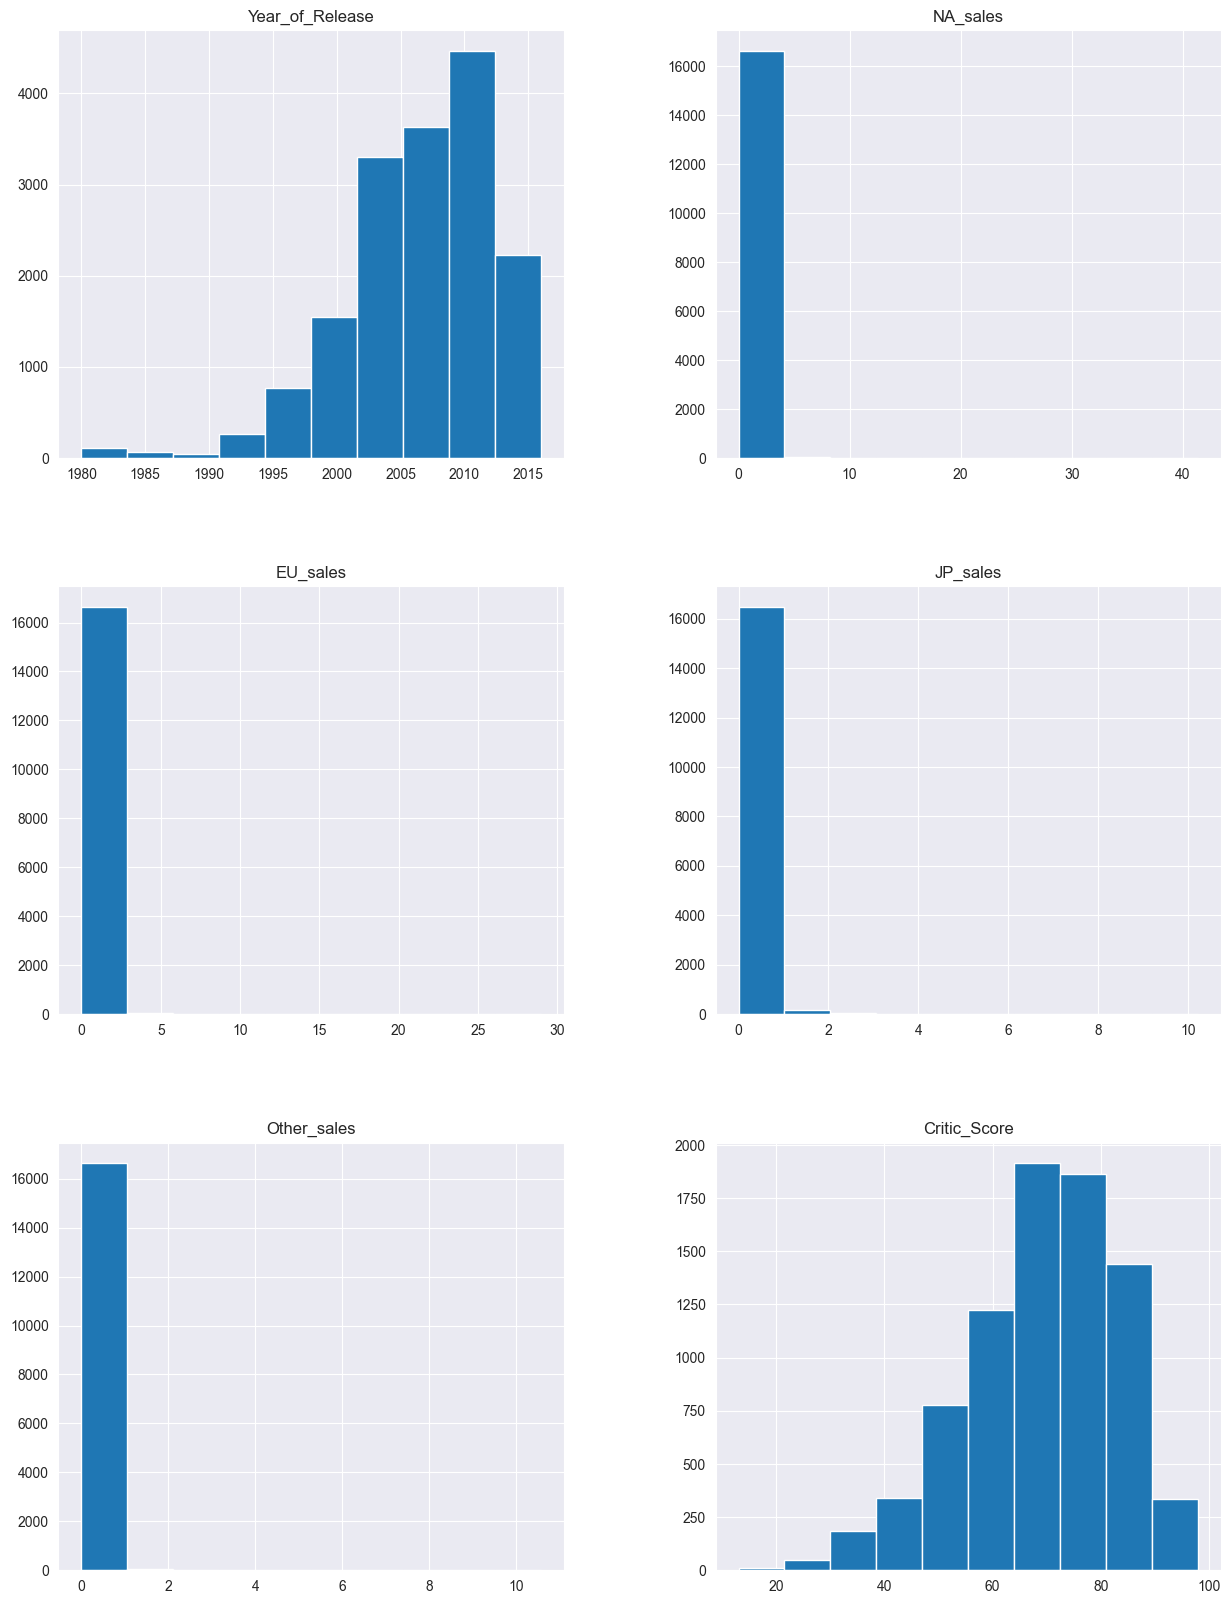

In [5]:
df.hist(figsize=(15, 20))
plt.show()

### Вывод

Первое представление о данных получено. Можно сделать следующие выводы:

- В таблице 11 столбцов и 16715 строк.
- Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения. А именно: в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.
- Необходимо изменить тип данных в столбцах `Year_of_Release` и `User_Score`.

## 2. Предобработка данных

Приведем названия столбцов к нижнему регистру.

In [6]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проверим, присутствуют ли в данных полные дубликаты.

In [7]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

Посмотрим, сколько пропусков в каждом столбце.

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Рассмотрим строки с пропущенными значениями в столбце `name`.

In [9]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего 2 строки. Не заполнено ни название, ни жанр, ни рейтинги. Вероятно, технический сбой при выгрузке данных или ошибка при заполнении. Удалим эти строки.

In [10]:
print('Количество строк до удаления:', df.shape[0])

Количество строк до удаления: 16715


In [11]:
df = df.dropna(subset=['name']).reset_index(drop=True)

In [12]:
print('Количество строк после удаления:', df.shape[0])

Количество строк после удаления: 16713


Посмотрим, сколько пропусков в столбце `year_of_release`.

In [13]:
print('Процент пропусков в столбце year_of_release:', 
      (df['year_of_release'].isna().sum() / df.shape[0] * 100).round(2), '%')

Процент пропусков в столбце year_of_release: 1.61 %


Всего 1,61%. Заполнять пропуски в данном столбце средним или медианным значениями будет некорректно. Удалим эти строки и изменим тип данных на `int`, так как год должен быть целочисленным значением.

In [14]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df['year_of_release'] = df['year_of_release'].astype('int')

In [15]:
print('Количество строк после удаления:', df.shape[0])

Количество строк после удаления: 16444


Посмотрим уникальные значения в столбце `critic_score`.

In [16]:
df['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

В столбе указаны оценки критиков по 100-балльной шкале. Так как в данном случае некорректно заполнять пропуски средними или медианными значениями, а удалять такой объем строк не хочется, оставим пропуски.

Посмотрим уникальные значения в столбце `user_score`.

In [17]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В столбце присутствуют строки со значением `tbd` - аббревиатура от английского `To Be Determined (будет определено)` или `To Be Decided (будет решено)`. Вероятно, оценка пользователей еще не подсчитана, поэтому заменим эти значения на `nan`.

Изменим тип данных на `float`, так как оценка не может быть строковым значением. Используя функцию `to_numeric` мы и изменим тип данных, и заменим `tbd` на `nan`.

In [18]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Еще раз посмотрим уникальные значения в столбце.

In [19]:
df['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

В столбе указаны оценки пользователей по 10-балльной шкале. Так как в данном случае некорректно заполнять пропуски средними или медианными значениями, а удалять такой объем строк не хочется, оставим пропуски. 

Посмотрим уникальные значения в столбце `rating`. 

In [20]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Все значения - реально существующие категории рейтинга игр ESRB. 

Пропуски заменим на значение `unknown`.

In [21]:
df['rating'] = df['rating'].fillna('unknown')

Убедимся, что пропуски заполнены верно.

In [22]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'unknown'],
      dtype=object)

Посмотрим, в каких столбцах остались пропуски.

In [23]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Принято решение оставить пропуски в данных столбцах.

Добавим столбец `total_sales` с суммарными продажами.

In [24]:
df['total_sales'] = df.loc[:, 'na_sales':'other_sales'].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Вывод

На этапе предобработки данных была проведена следующая работа:
- Названия столбцов приведены к нижнему регистру.
- Удалены строки с пропусками в столбцах `name`, `genre` и `year_of_release`. Заполнить их самостоятельно невозможно.
- Изменены типы данных в столбцах `year_of_release` и `rating`. 
- Пропуски в столбце `rating` заменены на значение `'unknown'`.
- В столбцах `critic_score` и `user_score` оставлены пропуски. Заполнить их средними или медианными значениями невозможно. Вероятно, пропуски присутствуют из-за малого количества оценок, недостаточных при подсчете средней оценки.
- К датафрейму добавлен столбец `total_sales` с суммарными продажами по всем регионам.

## 3. Исследовательский анализ данных

### Количество выпущенных игр по годам.

In [25]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Построим гистограмму.

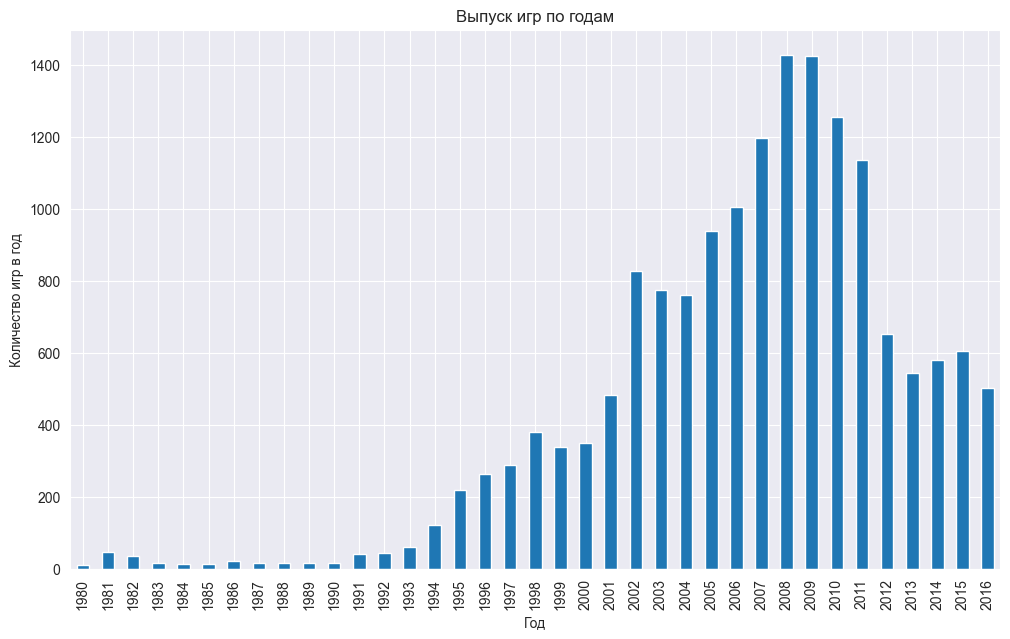

In [26]:
plt.figure(figsize=(12, 7))
df.groupby('year_of_release')['name'].count().plot(kind='bar', grid=True)
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр в год');

До 1994 года ежегодно выпускалось менее 100 игр. 

За исследуемый период наибольшее количество игр было выпущено с 2002 по 2011 годы. Абсолютный максимум – 1427 игр в 2008 году и 1426 игр в 2009 году. 

После 2009 года количество ежегодно выпускаемых игр стало уменьшаться.

### Изменение продаж по платформам.

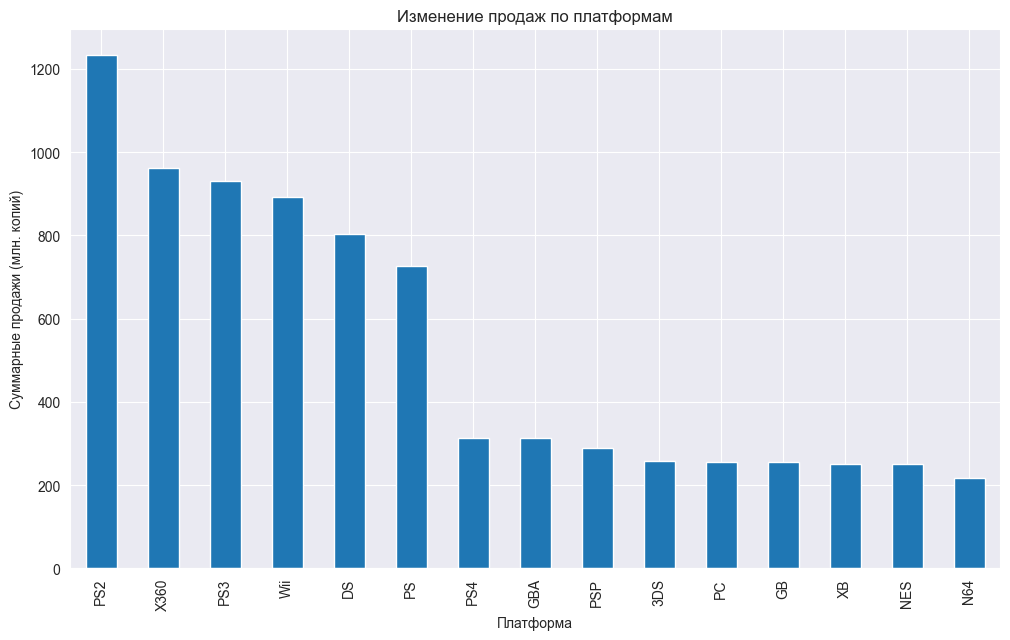

In [27]:
plt.figure(figsize=(12, 7))
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)[:15].plot(kind='bar', grid=True)
plt.title('Изменение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн. копий)');

Наибольшее количество игр было выпущено для платформы `PS2`. 

Топ-6 наиболее популярных платформ: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`.

Создадим сводную таблицу продаж игр по платформам.

In [28]:
platform_pivot = df.pivot_table(index='platform', 
                                values='total_sales',
                                aggfunc='sum').sort_values(by='total_sales',
                                                           ascending=False)

platform_pivot

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Построим гистограммы.

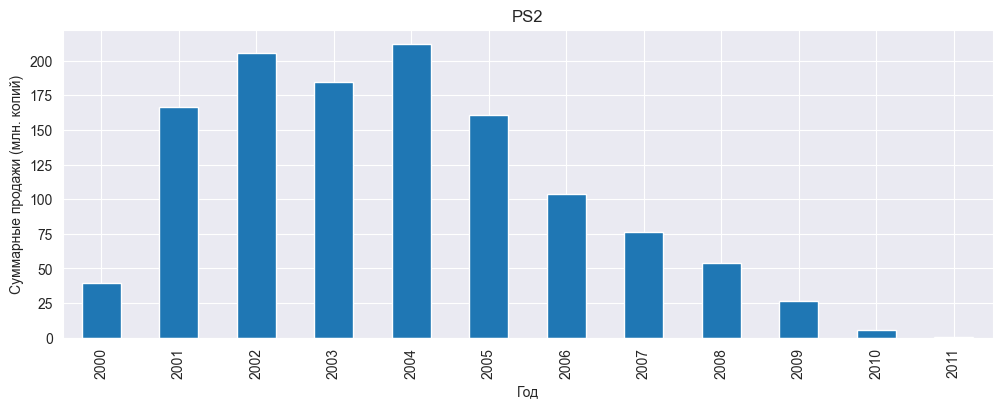

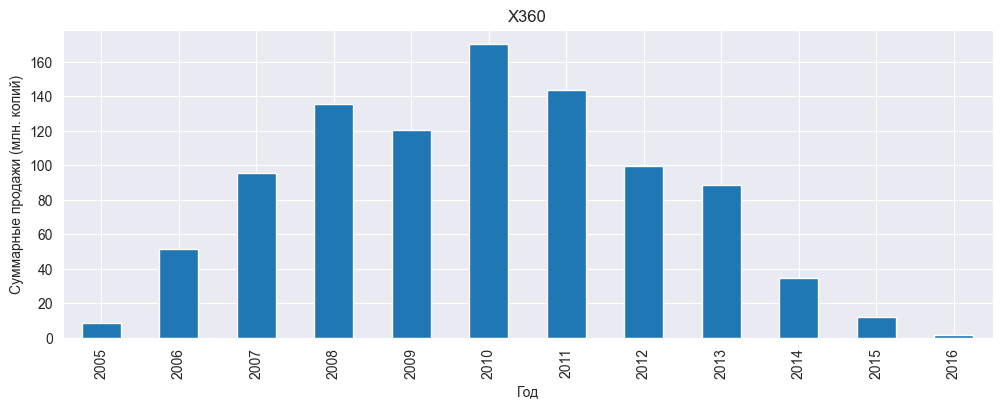

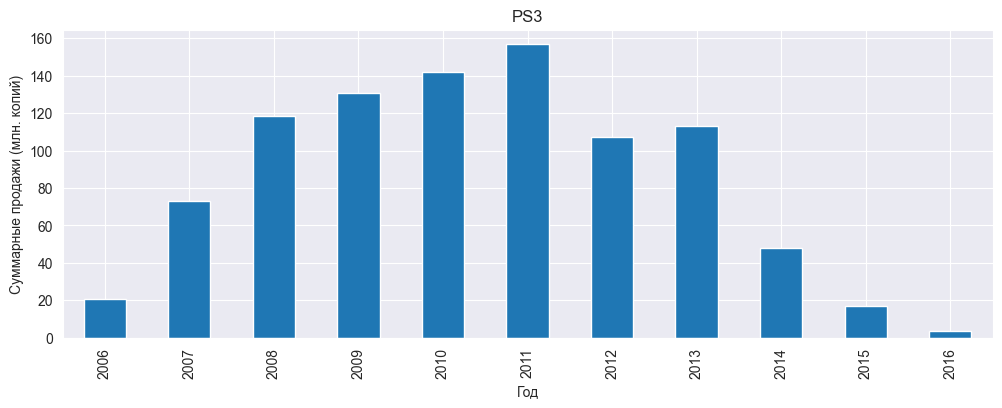

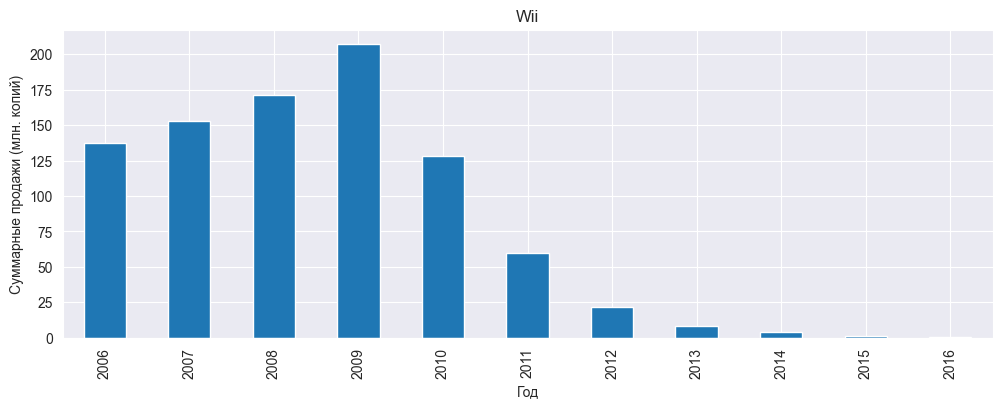

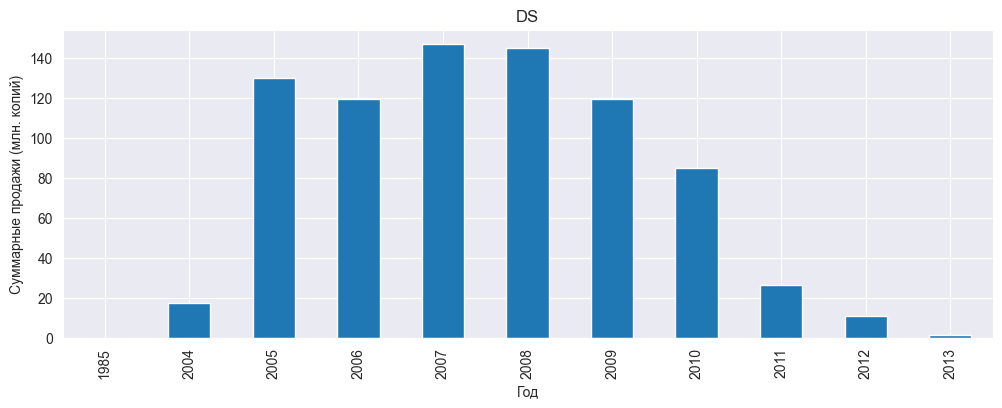

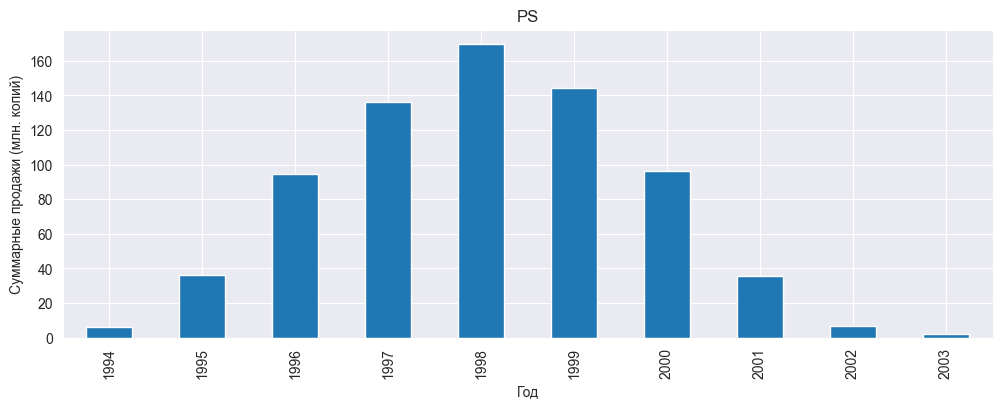

In [29]:
platform_list = platform_pivot.index.tolist()[:6]

for platform in platform_list:
    top_platform = df.query('platform == @platform').pivot_table(index='year_of_release', 
                                                                 values='total_sales', 
                                                                 aggfunc='sum')

    top_platform.plot(kind = 'bar', legend=False, grid=True, figsize=(12, 4))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи (млн. копий)')

Посмотрим, как долго существовали различные платформы.

In [30]:
platform_life = df.groupby('platform').agg({'year_of_release' : ['min', 'max']})

platform_life['lifecycle'] = platform_life['year_of_release', 'max'] - platform_life['year_of_release', 'min']

platform_life

year_of_release       lifecycle
                     min   max          
platform                                
2600                1980  1989         9
3DO                 1994  1995         1
3DS                 2011  2016         5
DC                  1998  2008        10
DS                  1985  2013        28
GB                  1988  2001        13
GBA                 2000  2007         7
GC                  2001  2007         6
GEN                 1990  1994         4
GG                  1992  1992         0
N64                 1996  2002         6
NES                 1983  1994        11
NG                  1993  1996         3
PC                  1985  2016        31
PCFX                1996  1996         0
PS                  1994  2003         9
PS2                 2000  2011        11
PS3                 2006  2016        10
PS4                 2013  2016         3
PSP                 2004  2015        11
PSV                 2011  2016         5
SAT                 1994  1999         5
SCD                 1993  1994         1
SNES                1990  1999         9
TG16                1995  1995         0
WS                  1999  2001         2
Wii                 2006  2016        10
WiiU                2012  2016         4
X360                2005  2016        11
XB                  2000  2008         8
XOne                2013  2016         3

In [31]:
mean_lifecycle = platform_life['lifecycle'].mean().round(1)
print('Средний жизненный цикл платформы:', mean_lifecycle)

Средний жизненный цикл платформы: 7.6


В среднем одна платформа существует около 7,6 лет. Учитывая, что активные продажи игр наступают не всегда с первого года, а в конце жизненного цикла всегда существует спад, а также учитывая то, как стремительно развивается данная отрасль, принимаю решение разделить жизненный цикл на 2 (для определения актуального периода).

In [32]:
mean_lifecycle = mean_lifecycle / 2
mean_lifecycle

3.8

Для выявления актуального периода вычтем от года исследования средний жизненный цикл платформы, разделенный на 2. 

Создадим новый датасет с актуальными данными

In [33]:
actual_df = df.loc[df['year_of_release'] > (2016 - mean_lifecycle)].reset_index(drop=True)
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [34]:
print('Количество строк:', actual_df.shape[0])

Количество строк: 2233


### Изменение продаж по платформам за актуальный период.

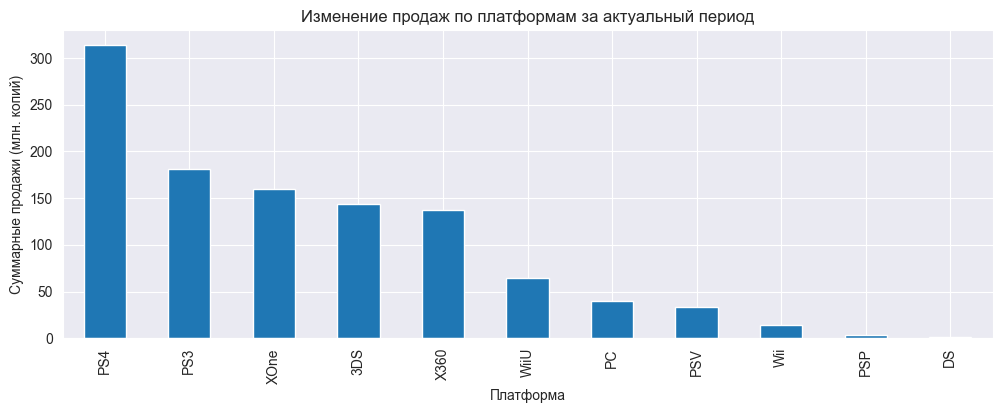

In [35]:
plt.figure(figsize=(12, 4))
actual_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Изменение продаж по платформам за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн. копий)');

Лидирующими платформами являются: `PS4`, `PS3`, `XOne`, `3DS` и `X360`.

Создадим сводную таблицу общих продаж игр по платформам для актуального периода.

In [36]:
actual_platform_pivot = actual_df.pivot_table(index='platform', 
                                              values='total_sales',
                                              aggfunc='sum').sort_values(by='total_sales',
                                                                         ascending=False)[:5]
actual_platform_pivot

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


Построим гистограммы для актуального периода.

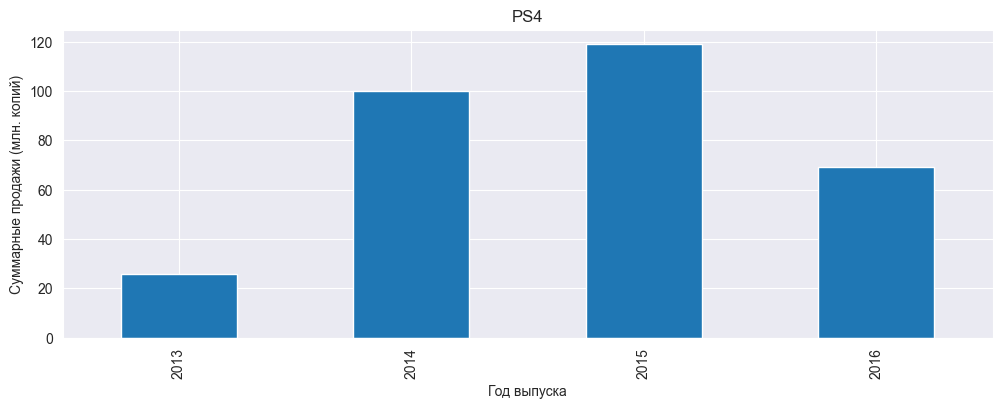

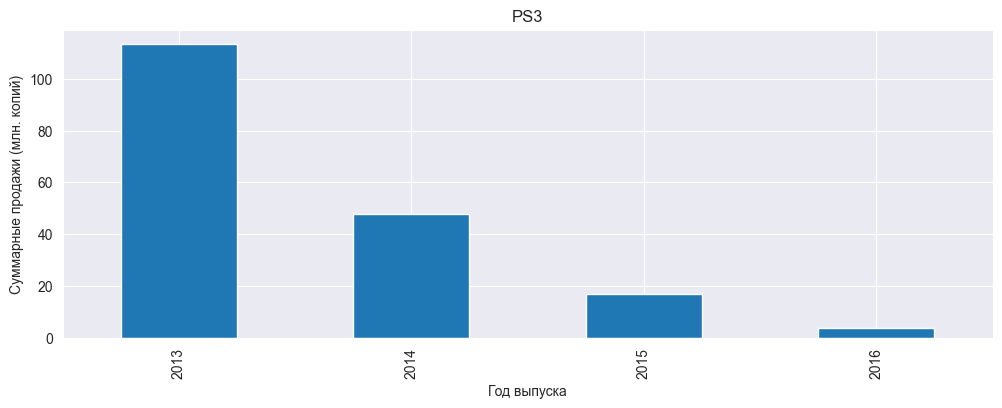

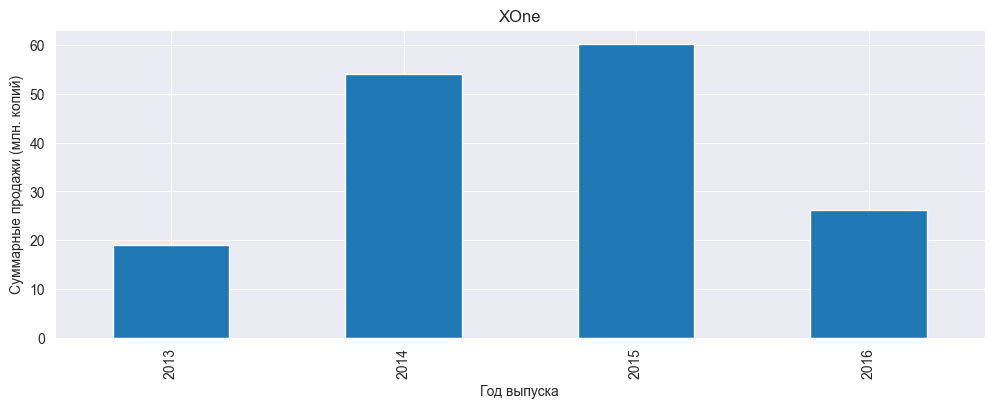

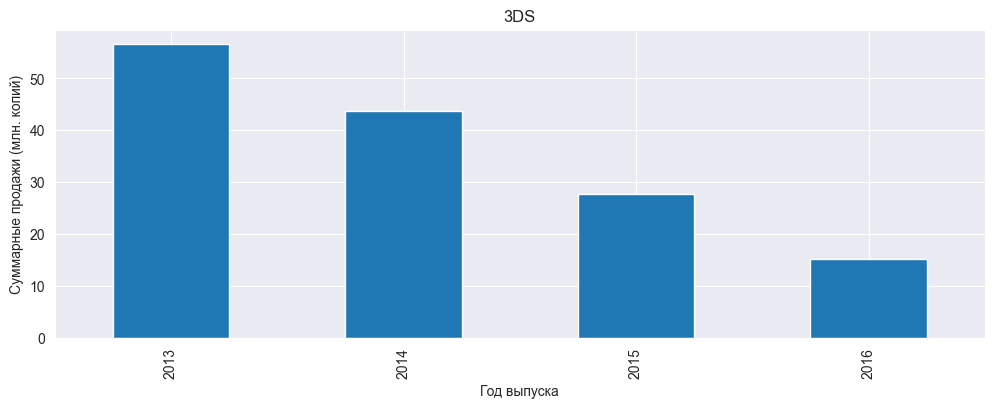

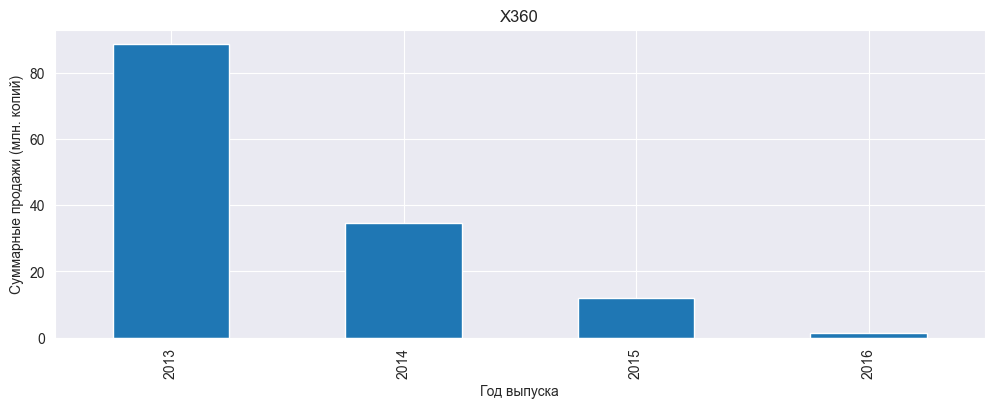

In [37]:
actual_platform_list = actual_platform_pivot.index.tolist()

for platform in actual_platform_list:
    actual_top_platform = actual_df.query('platform == @platform').pivot_table(index='year_of_release',
                                                                               values='total_sales', 
                                                                               aggfunc='sum')
    
    actual_top_platform.plot(kind = 'bar', legend=False, grid=True, figsize=(12, 4))
    plt.title(platform)
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи (млн. копий)')

За анализируемый период (2013-2016):
- продажи игр на `PS4` росли с 2013 по 2015 год, а в 2016 упали;
- продажи игр на `PS3` падают с каждым годом;
- продажи игр на `XOne` росли с 2013 по 2015 год, а в 2016 упали;
- продажи игр на `3DS` падают с каждым годом;
- продажи игрна `X360` падают с каждым годом.

Тем не менее, не стоит забывать, что изначально была оговорка о том, что данные за 2016 год могут быть неполными.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

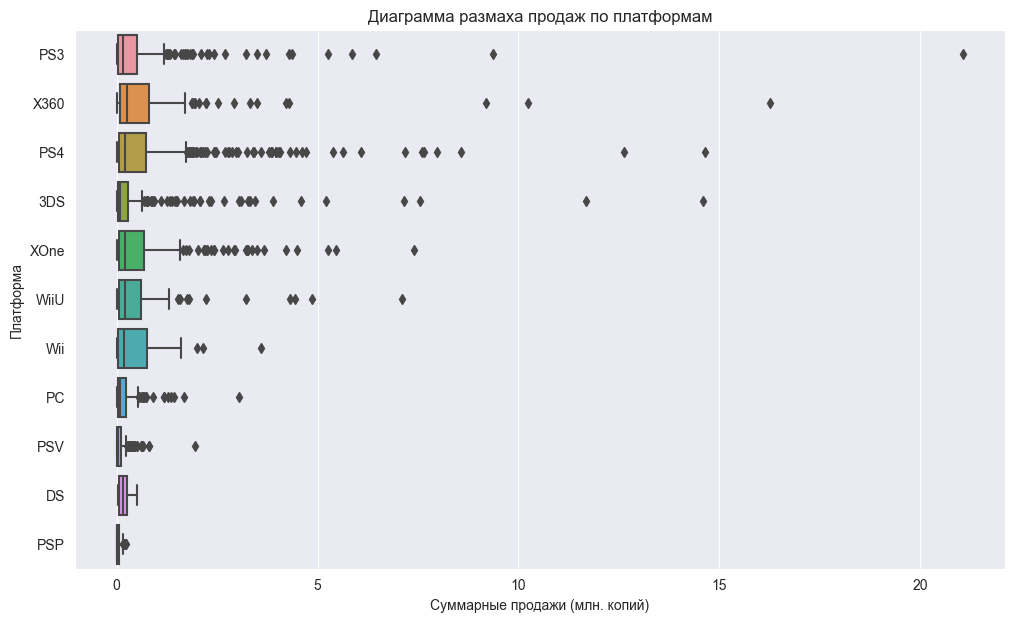

In [38]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    data = actual_df,
    y = 'platform',
    x = 'total_sales', 
    orient = 'h'
) 
plt.title('Диаграмма размаха продаж по платформам')
plt.xlabel('Суммарные продажи (млн. копий)')
plt.ylabel('Платформа');

По диаграмме размаха видно, насколько неоднородны данные - очень много выбросов.

Уберем с диаграммы выбросы, чтобы внимательнее рассмотреть данные.

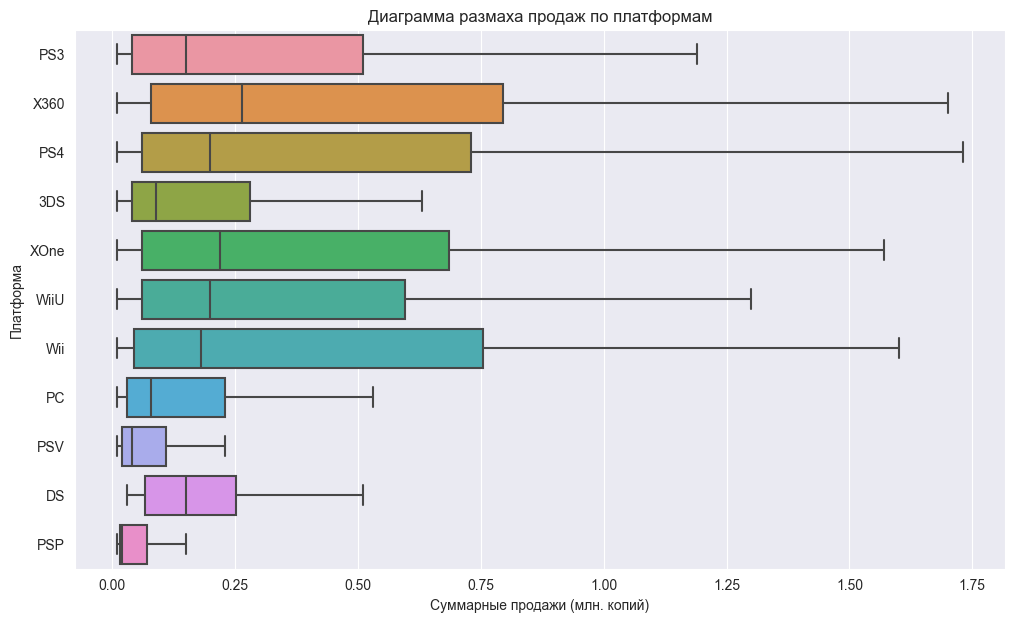

In [39]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    data = actual_df, 
    y = 'platform', 
    x = 'total_sales', 
    showfliers = False, # для отсечки выбросов
    orient = 'h'
) 
plt.title('Диаграмма размаха продаж по платформам')
plt.xlabel('Суммарные продажи (млн. копий)')
plt.ylabel('Платформа');

Судя по графику, самыми популярными платформами являются `PS4`, `X360`, `Wii`, `XOne`, `WiiU`, `PS3`.

Тем не менее, согласно проведенному ранее анализу, в списке лидирующих платформ отсутствует `Wii`, но есть `3DS`. А продажи игр для `PS3` и `X360` падают.

### Влияние отзывов пользователей и критиков на продажи внутри платформы 

Рассмотрим 3 наиболее популярные платформы: `PS4`, `PS3` и `XOne`.

#### PS4

In [40]:
actual_df.loc[actual_df['platform'] == 'PS4'][['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


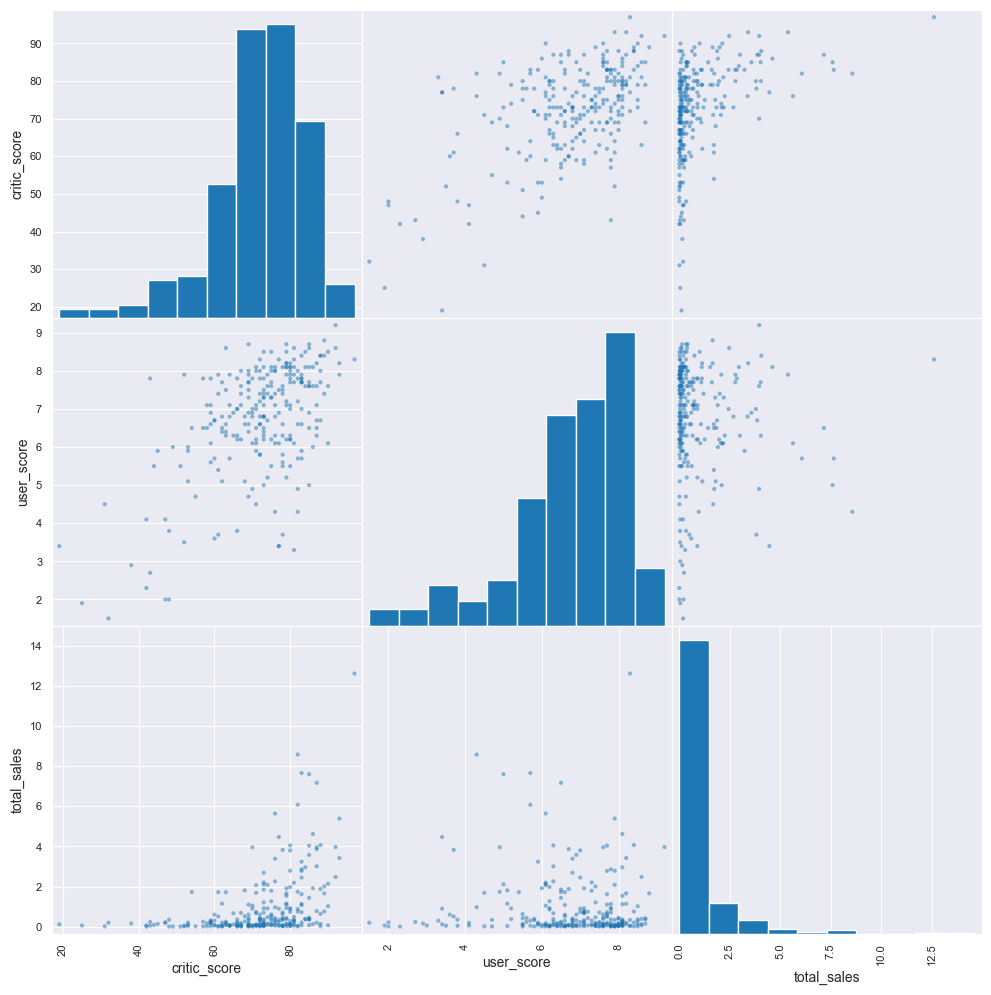

In [41]:
pd.plotting.scatter_matrix(actual_df.loc[actual_df['platform'] == 'PS4']
                           [['critic_score', 'user_score', 'total_sales']], figsize=(12, 12));

#### PS3

In [42]:
actual_df.loc[actual_df['platform'] == 'PS3'][['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.599920,0.334285
user_score,0.599920,1.000000,0.002394
total_sales,0.334285,0.002394,1.000000


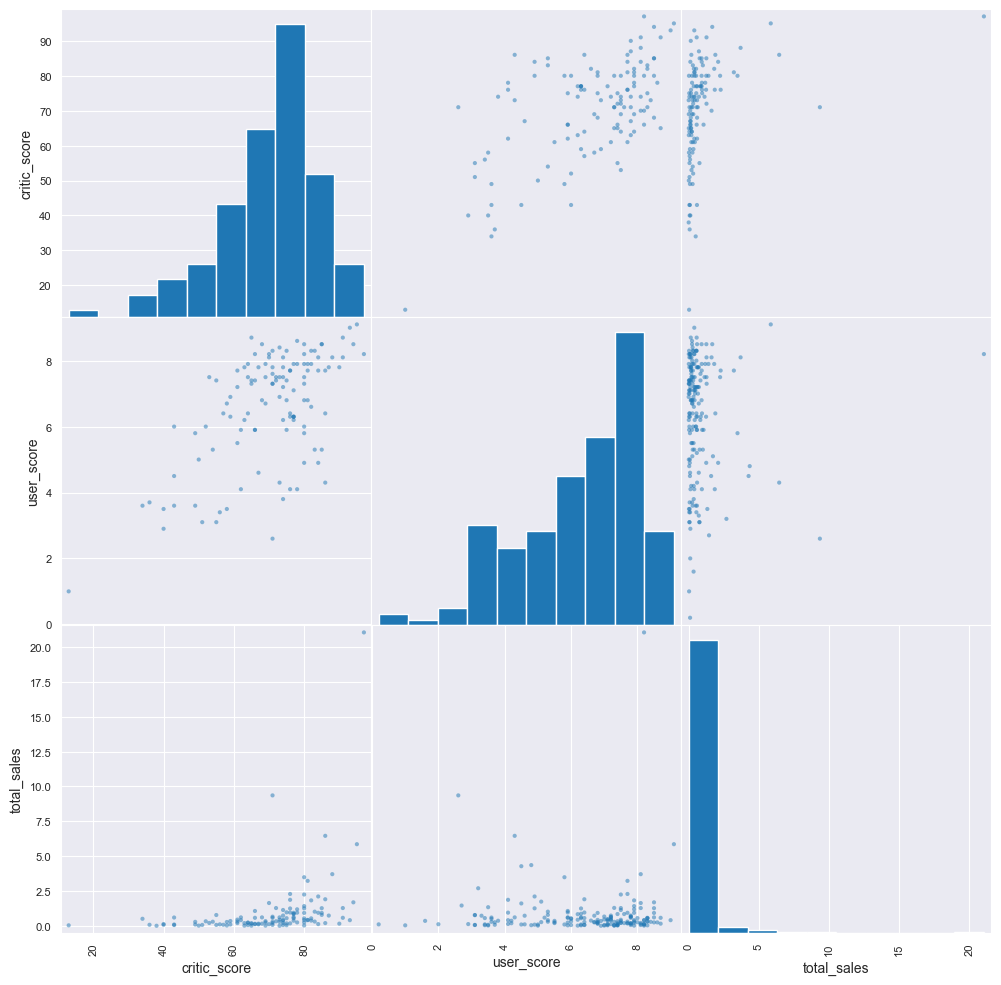

In [43]:
pd.plotting.scatter_matrix(actual_df.loc[actual_df['platform'] == 'PS3']\
                           [['critic_score', 'user_score', 'total_sales']], figsize=(12, 12));

#### XOne

In [44]:
actual_df.loc[actual_df['platform'] == 'XOne'][['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


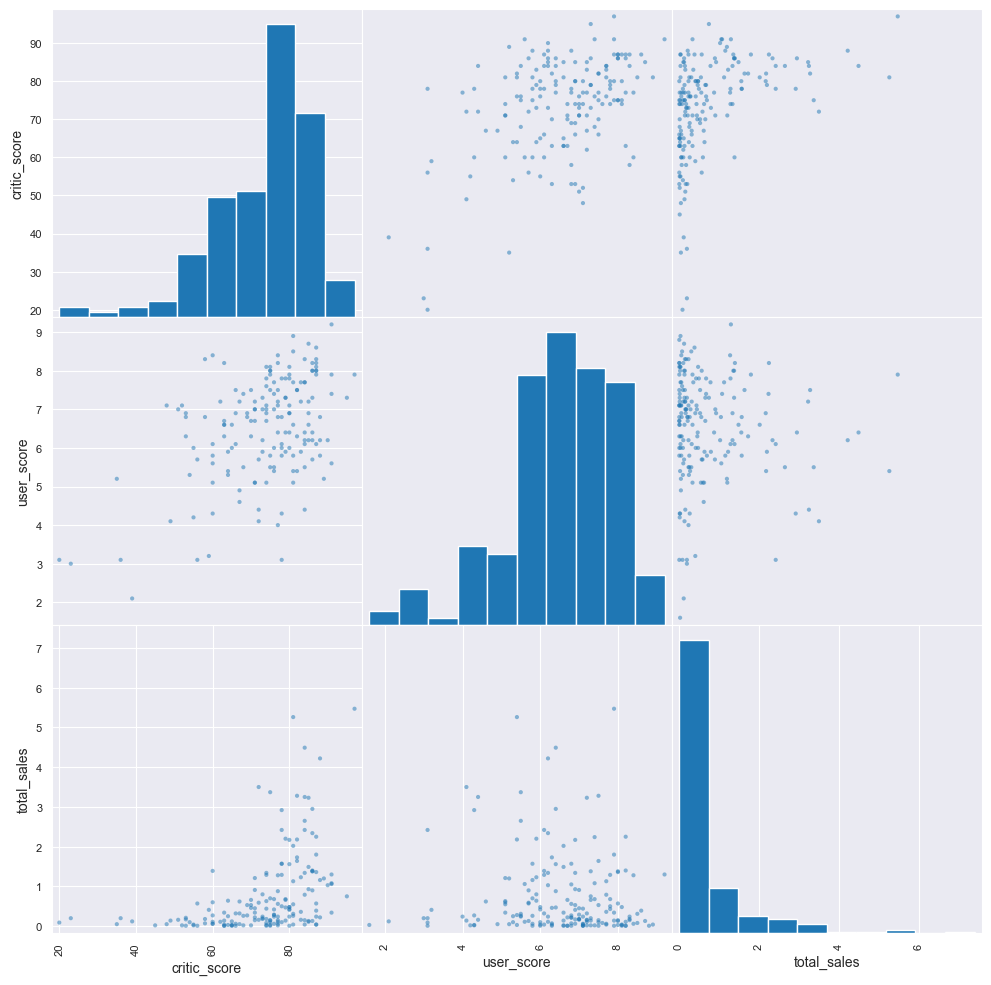

In [45]:
pd.plotting.scatter_matrix(actual_df.loc[actual_df['platform'] == 'XOne']\
                           [['critic_score', 'user_score', 'total_sales']], figsize=(12, 12));

Корреляция между общими продажами и оценками пользователей практически отсутствует. 

Корреляция между общими продажами и оценками критиков довольно слабая (от 0,33 до 0,41). Следовательно, чем выше оценки критиков, тем выше продажи.

### Общее распределение игр по жанрам.

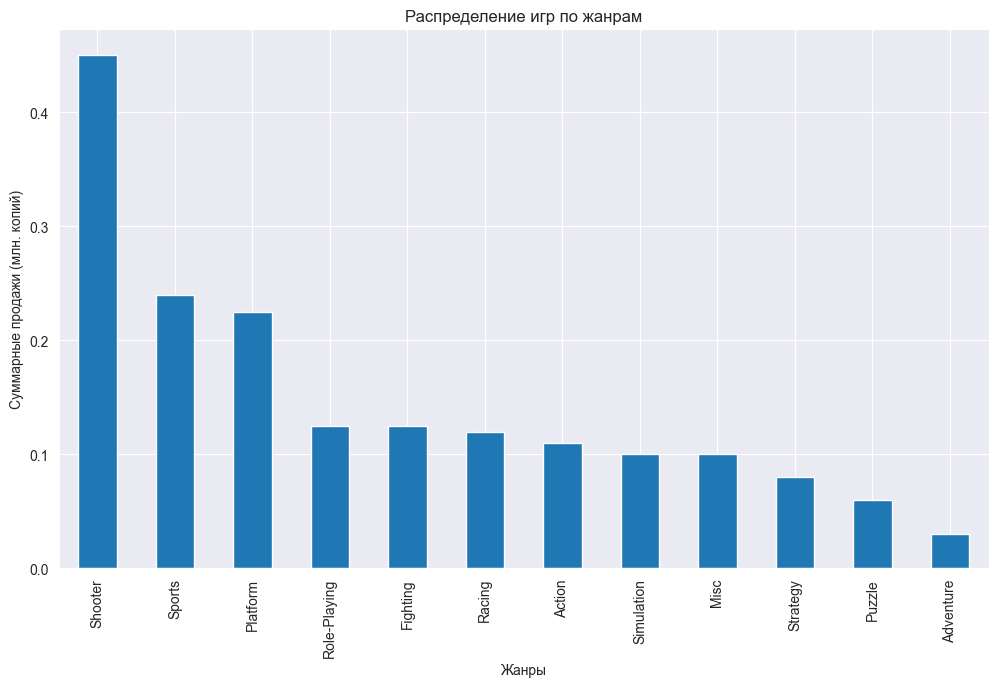

In [46]:
plt.figure(figsize=(12, 7))
actual_df.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи (млн. копий)');

Самым популярным и прибыльным жанром является `shooter`, также в тройку наиболее прибыльных жанров входят `sports` и `platform`. Суммарные продажи жанра `shooter` практически в 2 раза превышают продажи игр жанра `sports`.

Количество продаж игр других жанров в среднем одинаковое, наименее популярными являются игры жанра `adventure`.

### Вывод

- До 1994 года ежегодно выпускалось менее 100 игр. 
- За исследуемый период наибольшее количество игр было выпущено с 2002 по 2011 годы. Абсолютный максимум – 1427 игр в 2008 году и 1426 игр в 2009 году. 
- После 2009 года количество ежегодно выпускаемых игр стало уменьшаться.
- Топ-6 наиболее популярных платформ за период 1980-2016: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`.
- В среднем одна платформа существует около 7,6 лет.

Для построения прогноза на 2017 год для анализа был взят период 2013-2016:
- Топ-6 наиболее популярных платформ: `PS4`, `PS3`, `XOne`, `3DS`, `X360` и `WiiU`.
- Продажи игр на `PS4` и `XOne` росли с 2013 по 2015 год, а в 2016 упали.
- продажи игр на `WiiU` росли с 2013 по 2014 год, а затем стали падать.
- Продажи игр на `PS3`, `3DS` и `X360` падают с каждым годом.
- Корреляция между общими продажами и оценками пользователей практически отсутствует.
- Корреляция между общими продажами и оценками критиков довольно слабая (от 0,33 до 0,41). Следовательно, чем выше оценки критиков, тем выше продажи.
- Самым популярным и прибыльным жанром является `Shooter`, также в тройку наиболее прибыльных жанров входят `Sports` и `Platform`.

## 4. Портрет пользователя каждого региона

### Самые популярные платформы (топ-5).

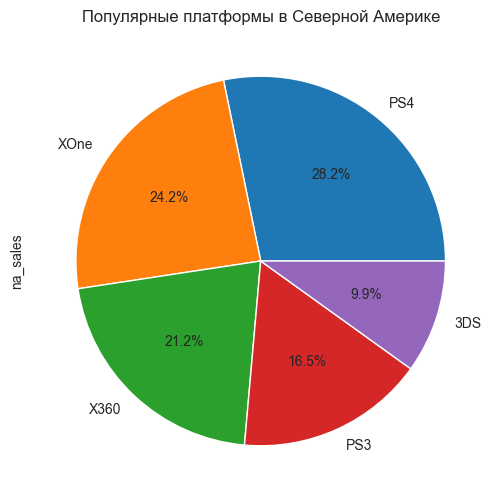

In [47]:
plt.figure(figsize=(12, 6))
actual_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5].plot.pie(autopct='%1.1f%%')
plt.title('Популярные платформы в Северной Америке');

В Северной Америке наиболее популярными платформами являются `PS4`, `XOne` и `X360`.

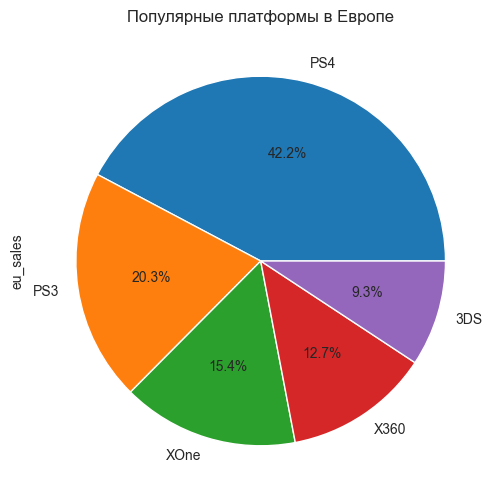

In [48]:
plt.figure(figsize=(12, 6))
actual_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5].plot.pie(autopct='%1.1f%%')
plt.title('Популярные платформы в Европе');

В Европе самой популярной платформой является `PS4`. Популярность данной платформы почти в 2 раза выше `PS3`. Популярность остальных платформ в среднем одинаковая.

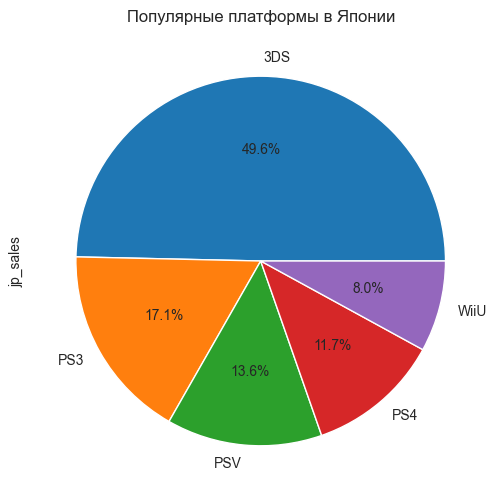

In [49]:
plt.figure(figsize=(12, 6))
actual_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5].plot.pie(autopct='%1.1f%%')
plt.title('Популярные платформы в Японии');

В Японии абсолютное большинство предпочитает `3DS`. Популярность остальных платформ в среднем одинаковая.

### Самые популярные жанры (топ-5).

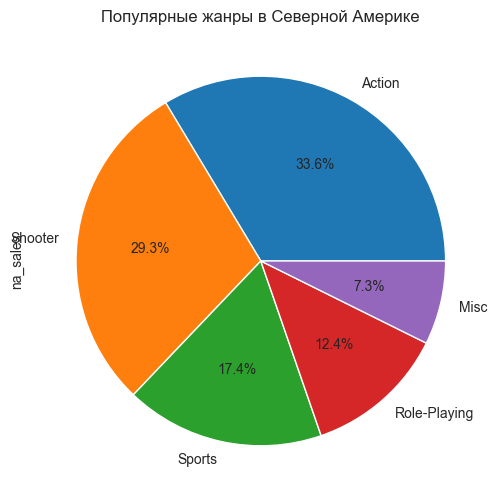

In [50]:
plt.figure(figsize=(12, 6))
actual_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5].plot.pie(autopct='%1.1f%%')
plt.title('Популярные жанры в Северной Америке');

В Северной Америке самыми популярными жанрами являются `Action` и `Shooter`, на 3 месте по популярности `Sports`.

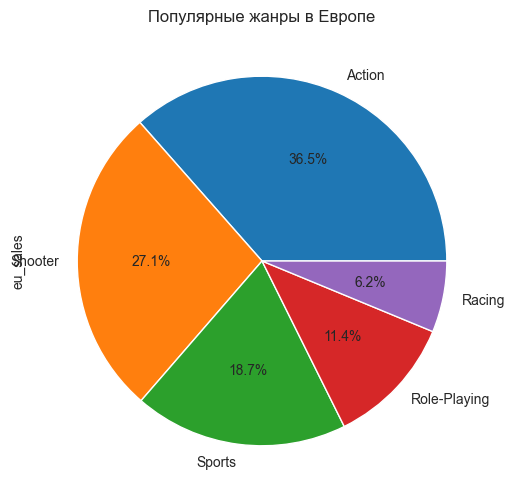

In [51]:
plt.figure(figsize=(12, 6))
actual_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5].plot.pie(autopct='%1.1f%%')
plt.title('Популярные жанры в Европе');

В Европе также самыми популярными жанрами являются `Action` и `Shooter`, на 3 месте по популярности `Sports`.

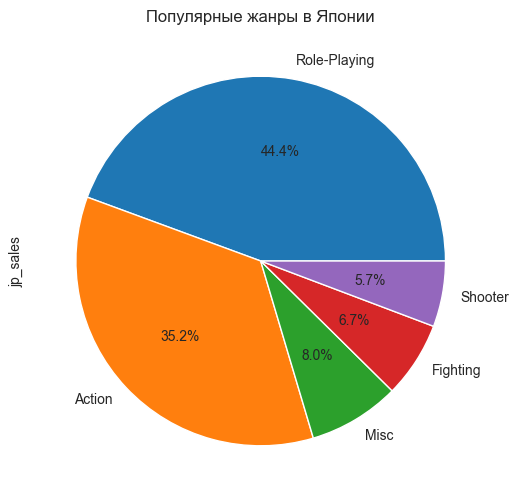

In [52]:
plt.figure(figsize=(12, 6))
actual_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5].plot.pie(autopct='%1.1f%%')
plt.title('Популярные жанры в Японии');

В Японии самыми популярными жанрами являются `Role-Playing` и `Action`. Популярность остальных жанров довольно низкая.

### Влияние рейтинга ESRB на продажи в регионах.

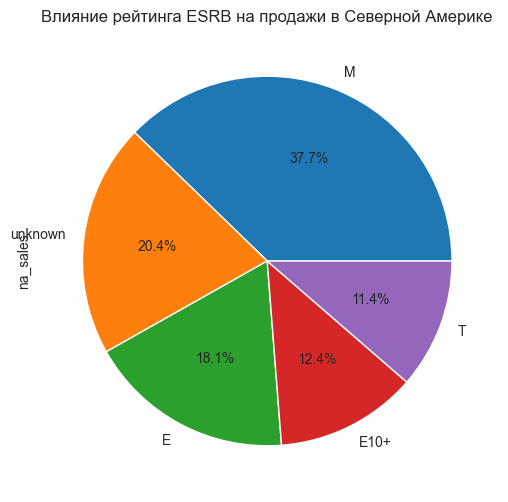

In [53]:
plt.figure(figsize=(12, 6))
actual_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%')

plt.title('Влияние рейтинга ESRB на продажи в Северной Америке');

В Северной Америке наиболее популярны игры с рейтингом `M («Для взрослых»: Материалы игры не подходят для лиц младше 17 лет)`, вдвое ниже продажи игр с рейтингом `E («Для всех»: Содержание вполне подходит для всех возрастов)`. Также видно, что у 20% проданных игр не определен рейтинг ESBR.

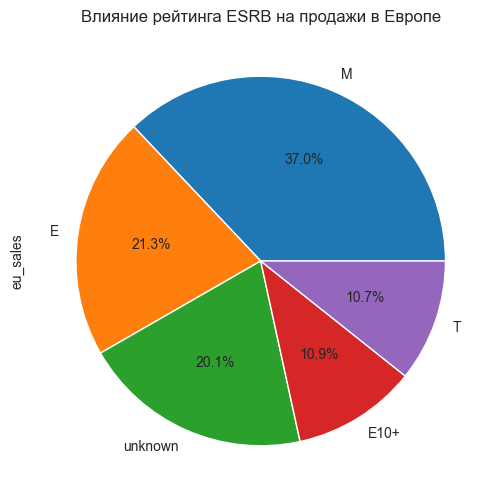

In [54]:
plt.figure(figsize=(12, 6))
actual_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%')
plt.title('Влияние рейтинга ESRB на продажи в Европе');

В Европе также наиболее популярны игры с рейтингом `M («Для взрослых»: Материалы игры не подходят для лиц младше 17 лет)`, вторыми по популярности являются игры с рейтингом `E («Для всех»: Содержание вполне подходит для всех возрастов)`. Также, как и в Северной Америке, у 20% проданных игр не определен рейтинг ESBR.

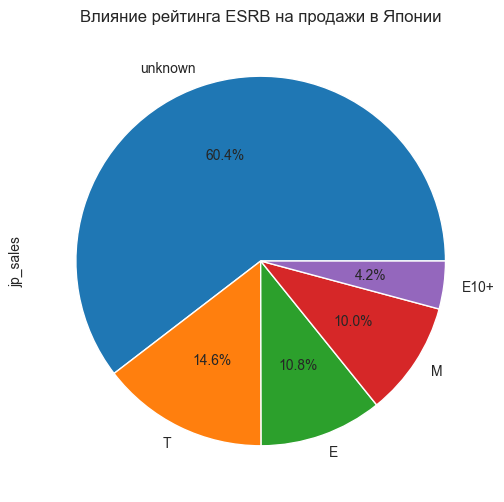

In [55]:
plt.figure(figsize=(12, 6))
actual_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot.pie(autopct='%1.1f%%')
plt.title('Влияние рейтинга ESRB на продажи в Японии');

В Японии у 60% игр не определен рейтинг ESBR.

Из известных данных наиболее популярны игры с рейтингом `T («Подросткам»: Игра подходит для лиц от 13 лет)`, чуть менее популярны игры с рейтингами `E («Для всех»: Содержание вполне подходит для всех возрастов)` и `M («Для взрослых»: Материалы игры не подходят для лиц младше 17 лет)`.

## 5. Проверка гипотез

Проведем проверку гипотез о равенстве средних двух генеральных совокупностей (двухстороннюю).

Пороговое значение alpha примем равным 0.05.

### 5.1. Являются ли одинаковыми пользовательские рейтинги платформ Xbox One и PC.

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [56]:
results = st.ttest_ind(
    actual_df.loc[(actual_df['platform'] == 'PC')]['user_score'], 
    actual_df.loc[(actual_df['platform'] == 'XOne')]['user_score'], nan_policy='omit'
)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


Исходя из полученных результатов мы не можем отвергнуть нулевую гипотезу. Следовательно, у нас нет оснований утверждать, что рейтинги являются разными.

Рассмотрим средние пользовательские оценки платформ.

In [57]:
print('Средняя оценка пользователей PC:', actual_df.loc[(actual_df['platform'] == 'PC')]['user_score'].mean())

print('Средняя оценка пользователей XOne:', actual_df.loc[(actual_df['platform'] == 'XOne')]['user_score'].mean())

Средняя оценка пользователей PC: 6.269677419354839
Средняя оценка пользователей XOne: 6.521428571428572


Пользовательские оценки платформ `Xbox One` и `PC` действительно довольно близки по значениям.

### 5.2. Являются ли разными пользовательские рейтинги жанров Action и Sports.

- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [58]:
results = st.ttest_ind(
    actual_df.loc[(actual_df['genre'] == 'Action')]['user_score'], 
    actual_df.loc[(actual_df['genre'] == 'Sports')]['user_score'], nan_policy='omit'
)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389139422e-27
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Следовательно, у нас нет оснований утверждать, что cредние пользовательские рейтинги жанров `Action` и `Sports` являются одинаковыми.

Рассмотрим средние пользовательские оценки жанров.

In [59]:
print('Средняя оценка пользователей Action:', actual_df.loc[(actual_df['genre'] == 'Action')]['user_score'].mean())

print('Средняя оценка пользователей Sports:', actual_df.loc[(actual_df['genre'] == 'Sports')]['user_score'].mean())

Средняя оценка пользователей Action: 6.837532133676093
Средняя оценка пользователей Sports: 5.238124999999999


Пользовательские оценки жанров `Action` и `Sports` действительно отличаются.

## 6. Вывод

За исследуемый период наибольшее количество игр было выпущено с 2002 по 2011 годы. Абсолютный максимум – 1427 игр в 2008 году и 1426 игр в 2009 году. 

После 2009 года количество ежегодно выпускаемых игр стало уменьшаться.

**Для построения прогноза на 2017 год для анализа был взят период 2013-2016:**
- Топ-6 наиболее популярных платформ за этот: `PS4`, `PS3`, `XOne`, `3DS`, `X360` и `WiiU`.
- Продажи игр на `PS4` и `XOne` росли с 2013 по 2015 год, а в 2016 упали.
- продажи игр на `WiiU` росли с 2013 по 2014 год, а затем стали падать.
- Продажи игр на `PS3`, `3DS` и `X360` падают с каждым годом.
- Корреляция между общими продажами и оценками пользователей практически отсутствует.
- Корреляция между общими продажами и оценками критиков довольно слабая. Тем не менее, существует прямая зависимость - чем выше оценки критиков, тем выше продажи.
- Самым популярным и прибыльным жанром является `Shooter`, также в тройку наиболее прибыльных жанров входят `Sports` и `Platform`.

**Самые популярные платформы:**
- В Северной Америке: `PS4`, `XOne` и `X360`.
- В Европе: `PS4` и `PS3`.
- В Японии: `3DS`.

**Самые популярные жанры:**
- В Северной Америке и Европе: `Action`, `Shooter` и `Sports`.
- В Японии: `Role-Playing` и `Action`.

**Рейтинг ESRB самых популярных игр:**
- В Северной Америке и Европе: `M («Для взрослых»: Материалы игры не подходят для лиц младше 17 лет)` и `E («Для всех»: Содержание вполне подходит для всех возрастов)`. Продажи игр с рейтингом `E` почти вдвое ниже, чем `M` в обоих регионах. Тем не менее, у 20% игр не определен рейтинг ESBR.
- В Японии: в анализируемых данных у 60% игр не определен рейтинг ESBR. Из известных данных наиболее популярны игры с рейтингом `T («Подросткам»: Игра подходит для лиц от 13 лет)`, `E («Для всех»: Содержание вполне подходит для всех возрастов)` и `M («Для взрослых»: Материалы игры не подходят для лиц младше 17 лет)`.

Средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

Средние пользовательские рейтинги жанров Action и Sports отличаются.

**Подводя итог**, хочется отметить, что в Северной Америке и Европе предпочтения в выборе платформ и жанров практически идентичны. Игры жанров `Action` и `Shooter` для `PS4` с рейтингом `M` должны быть довольно популярными.
Рынок в Японии довольно сильно отличается. Здесь наиболее популярными могут стать `Role-Playing` и `Action` для `3DS` с рейтингом `T`, `E` или `M`.